<a href="https://colab.research.google.com/github/russodanielp/intro_cheminformatics/blob/google_colab/Lab%2004%20-%20Advanced%20Python%2C%20Rdkit/colab_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Python and the RDKit

## Aim of this lab

To learn some more advanced Python Programming.  

### Objectives

* Understand the basics of object oriented programing
* Learn about RDKit
* Learn the how to make plots in matplotlib


### RDKit 

The [RDKit](https://www.rdkit.org/docs/Overview.html#) is a open-source Python library for doing chemistry in Python.

It's not necessary to understand fully understand object-oriented programming in order to use the RDKit, but its necessary to understand that chemicals (more often referred to as molecules) are objects.  Objects in Python are things that share common features in order to save code.  What that means for RDKit is that mostly all the functionality of rdkit is written around the `Mol` object, short for molecule. 

Once we create a `Mol` object, we know we'll be able to do perform certain functionalities on that object.  For example, every molecule has atoms, therefore every `Mol` object has the ability to retrieve the number of atoms in the underlying chemical through the `GetNumAtoms()` function that every `Mol` object has.  

Therefore, once we create a `Mol` object from the chemical we are interested in, we'll have the entire functionality of RDKit at out fingertips.  

So, how do we create a `Mol` object?  There are tons of ways.  We can create them from strings of chemical structure annotations as we learned in Lab 2.  The most common are SMILES and InChI.

Let's create benzene and asprin from SMILES and InChI, respectively. 

#### Installation

We first install RDKit on the Google Colab servers by using the terminal and pip

In [15]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [17]:
# benzene_smiles 
benzene_smiles = 'c1ccccc1'

# aspirin inchi
aspirin_inchi = 'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

benzene = Chem.MolFromSmiles(benzene_smiles)
aspirin = Chem.MolFromInchi(aspirin_inchi)

Because we are working in a Google colab, the molecules will be drawn for us...

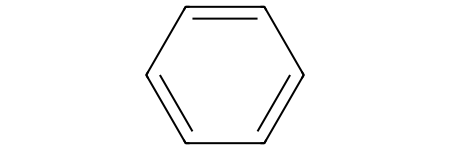

In [18]:
benzene

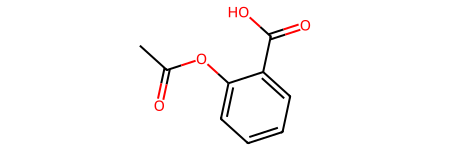

In [19]:
aspirin

But if we print it out we can see that we created an rdkit `Mol` object

In [20]:
print(benzene)

Of course for any molecule object, we can get any annotation we want from the `Mol`..

In [21]:
benzene_smiles = Chem.MolToSmiles(benzene)
benzene_inchi = Chem.MolToInchi(benzene)
benzene_mol_block = Chem.MolToMolBlock(benzene)

print("The SMILES of benzene is : ", benzene_smiles)
print("The InChI of benzene is : ", benzene_inchi)
print("The Mol Block for benzene is: ", benzene_mol_block)

The SMILES of benzene is :  c1ccccc1
The InChI of benzene is :  InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H
The Mol Block for benzene is:  
     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



There is a wide array of functionality possible on a single molecule.  Every molecule is represented as a graph, and as such, we can access the individual bonds and atoms individually. 

Atoms and bonds themselves are objects with their own useful methods and properies.  They are stored as lists and, thus, can be accessed via indexing.  

Let's investigate going through the atoms and bonds in our aspirin molecule.

In [22]:
num_atoms = aspirin.GetNumAtoms()
num_bonds = aspirin.GetNumBonds()

first_bond = aspirin.GetBondWithIdx(0)
first_atom = aspirin.GetAtomWithIdx(0)

first_atom_symbol = first_atom.GetSymbol()
first_bond_type = first_bond.GetBondType()

print("First atom is: ", first_atom_symbol)
print("First bond type is: ", first_bond_type)

First atom is:  C
First bond type is:  SINGLE


Because they are stored as lists, we can iterate over them.

In [23]:
for atom_i in range(num_atoms):
  atom_i_obj = aspirin.GetAtomWithIdx(atom_i)
  atom_i_type = atom_i_obj.GetSymbol()
  print("Atom ", atom_i, " atom type is ", atom_i_type)

for bond_i in range(num_bonds):
  bond_i_obj = aspirin.GetBondWithIdx(bond_i)
  bond_i_type = bond_i_obj.GetBondType()
  print("Bond ", bond_i, " bond type is ", bond_i_type)

Atom  0  atom type is  C
Atom  1  atom type is  C
Atom  2  atom type is  C
Atom  3  atom type is  C
Atom  4  atom type is  C
Atom  5  atom type is  C
Atom  6  atom type is  C
Atom  7  atom type is  C
Atom  8  atom type is  C
Atom  9  atom type is  O
Atom  10  atom type is  O
Atom  11  atom type is  O
Atom  12  atom type is  O
Bond  0  bond type is  SINGLE
Bond  1  bond type is  AROMATIC
Bond  2  bond type is  AROMATIC
Bond  3  bond type is  AROMATIC
Bond  4  bond type is  AROMATIC
Bond  5  bond type is  AROMATIC
Bond  6  bond type is  DOUBLE
Bond  7  bond type is  SINGLE
Bond  8  bond type is  AROMATIC
Bond  9  bond type is  SINGLE
Bond  10  bond type is  SINGLE
Bond  11  bond type is  DOUBLE
Bond  12  bond type is  SINGLE


The helpful functions `GetAtoms()` and `GetBonds` allow us to iterate over atoms directly.

In [24]:
for atom in aspirin.GetAtoms():
  print("Atom type: ", atom.GetSymbol())

Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  C
Atom type:  O
Atom type:  O
Atom type:  O
Atom type:  O


### Substructure searching

You can make queries on molecules and search for certain structures.  One way of doing this is by using [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html). SMARTS are a chemical text language similar to SMILES except for generalizing more abstract chemical concepts.  They are similar to [regular expressions](https://en.wikipedia.org/wiki/Regular_expression), which are used to match text patterns.  In SMARTS, you can search for things like "any aromatic atom" or "sp2 hybridized carbons not bonded to nitrogen".  They range very coplex to simple. 

Let's search for a c-c-0 bond on a molecule with the following smiles: c1ccccc1O   

In [25]:
mol = Chem.MolFromSmiles('c1ccccc1O')
pattern = Chem.MolFromSmarts('ccO')

matches = mol.GetSubstructMatches(pattern)
print(matches)

((0, 5, 6), (4, 5, 6))


This automatically highlights the atoms in the molecule.

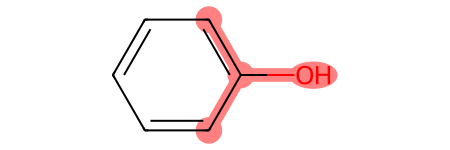

In [26]:
mol

By default information about stereochemistry is not used in substructure searches. But this can be changed via the useChirality argument.

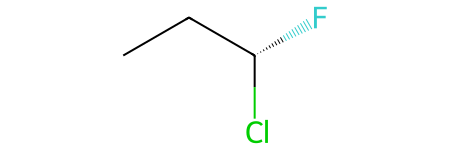

In [27]:
mol2 = Chem.MolFromSmiles('CC[C@H](F)Cl')
mol2

In [28]:
center = Chem.MolFromSmarts('C[C@@H](F)Cl')
mol2.HasSubstructMatch(center)

True

In [29]:
mol2.HasSubstructMatch(center, useChirality=True)

False

### Reading sets of molecules

It is possible to read to sets of molecules from an SDFile.  For example, in this labs we will use a dataset of compounds with activity against the benzodiazipine receptor takein from [this](https://pubs.acs.org/doi/10.1021/ci900117m) publication.  

It is in the `data` folder for this lab stored in `sdf` format.  We will use the `SDMolSupplier` function, which will an interable object, containing all the molecules in the dataset as `Mol` objects.  We just need to provide the path to the SDFile.  

In [31]:
from google.colab import files
import io

uploaded = files.upload()

Saving DIAZEPAM.sdf to DIAZEPAM.sdf


In [32]:
benzo_sdf = 'DIAZEPAM.sdf'

benzos = Chem.SDMolSupplier(benzo_sdf)
print("There are", len(benzos), "diazepam compounds.")
print(benzos)

There are 42 diazepam compounds.


The `SDMolSupplier` object is similiar to a python list and therefore each element can be accessed via a an index.

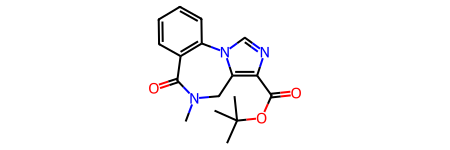

In [33]:
benzos[0]

### Pandas

The rdkit has some functionality for working directly with Pandas dataframes, which can be pretty useful for working with compounds that have bioactivity data and their structure information in smiles format.  It is necessary to import this module seperately.  Note: make sure the environment is running Pandas version 1.1.3 as noted [here](https://gist.github.com/greglandrum/3b9da87a20e9b0d4827bbf1e64f68056).

In [34]:
import pandas as pd
from rdkit.Chem import PandasTools

uploaded = files.upload()

Saving DIAZEPAM.txt to DIAZEPAM.txt


In [35]:
df = pd.read_table('DIAZEPAM.txt')
df.head()

,MolSmiles,Bio_Activity
0,CC(C)(C)OC(=O)c1c2n(cn1)-c3ccccc3C(=O)N(C2)C,-1.28
1,CN1Cc2c(ncn2-c3ccc(cc3C1=O)Cl)C(=O)OC,-0.62
2,CCCOC(=O)c1c2n(cn1)-c3ccc(cc3C(=O)N(C2)C)Cl,-0.13
3,CC(C)OC(=O)c1c2n(cn1)-c3ccc(cc3C(=O)N(C2)C)Cl,0.08
4,CN1Cc2c(ncn2-c3ccc(cc3C1=O)Cl)C(=O)OCC4CC4,-0.61


We need to tell rdkit which column has our smiles string. 

In [36]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='MolSmiles')

In [37]:
df.head(3)

,MolSmiles,Bio_Activity,ROMol
0,CC(C)(C)OC(=O)c1c2n(cn1)-c3ccccc3C(=O)N(C2)C,-1.28,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be1a50>
1,CN1Cc2c(ncn2-c3ccc(cc3C1=O)Cl)C(=O)OC,-0.62,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be16d0>
2,CCCOC(=O)c1c2n(cn1)-c3ccc(cc3C(=O)N(C2)C)Cl,-0.13,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be1ac0>


You can even read an `sdf` file directly to a pandas dataframe. 

In [40]:
PandasTools.LoadSDF('DIAZEPAM.sdf').head(3)

,ID,ROMol
0,,<rdkit.Chem.rdchem.Mol object at 0x7ffae3aaad60>
1,,<rdkit.Chem.rdchem.Mol object at 0x7ffae3aaadd0>
2,,<rdkit.Chem.rdchem.Mol object at 0x7ffae3aaa510>


This makes writing to files after doing some sort of processing on the database easy.  

We can add a column consiting of names for our molecules and write that to a new sdf. 

In [44]:
names = []

for i in range(df.shape[0]):
  name = 'Mol_' + str(i)
  names.append(name)

df['Name'] = names

df.head()

,MolSmiles,Bio_Activity,ROMol,Name
0,CC(C)(C)OC(=O)c1c2n(cn1)-c3ccccc3C(=O)N(C2)C,-1.28,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be1a50>,Mol_0
1,CN1Cc2c(ncn2-c3ccc(cc3C1=O)Cl)C(=O)OC,-0.62,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be16d0>,Mol_1
2,CCCOC(=O)c1c2n(cn1)-c3ccc(cc3C(=O)N(C2)C)Cl,-0.13,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be1ac0>,Mol_2
3,CC(C)OC(=O)c1c2n(cn1)-c3ccc(cc3C(=O)N(C2)C)Cl,0.08,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be1b30>,Mol_3
4,CN1Cc2c(ncn2-c3ccc(cc3C1=O)Cl)C(=O)OCC4CC4,-0.61,<rdkit.Chem.rdchem.Mol object at 0x7ffae3be1ba0>,Mol_4


In [45]:
PandasTools.WriteSDF(df, 'DIAZEPAM_w_name.sdf', properties=['Name', 'MolSmiles', 'Bio_Activity'])